### 간단한 선형회귀 = 성적 데이터 생성

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.DataFrame([[2,20],[4,40],[8,80],[9,90]],
                    index = ['서연','경진','다희','정선'],
                    columns = ['시간','성적'])
data

,시간,성적
서연,2,20
경진,4,40
다희,8,80
정선,9,90


### 선형회귀 공식을 사용한 회귀  
- 수학 공식을 이용한 해석적 모델 -> LinearRegression

In [3]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

In [4]:
linear_model.fit(data[['시간']],data['성적'])

LinearRegression()

In [5]:
# y = wx + b
print('가중치 : ', linear_model.coef_)
print('절편 : ', linear_model.intercept_)

가중치 :  [10.]
절편 :  7.105427357601002e-15


In [6]:
# 준연 7시간 공부
linear_model.predict([[7]])

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.])

### MES가 최소가 되는 최적의 w,b를 찾아내는 방법  
- MSE : 평균제곱오차(Mean Squared Error) -> 비용함수(cost)  
- 1. 수학공식을 이용한 해석적 모델 -> Linear Regression도구
- 2. 경사 하강법 -> SGD Regressor 도구

In [7]:
# h(X) 가설 함수 -> y = wx+b
def h(w,x):
    return w*x+0

In [8]:
# mse(비용함수)정의
# data -> 문제값
# target -> 실제값
# weight -> 가중치
def cost(data, target, weight):
    # 예측
    y_pre = h(weight, data)
    # 평균제곱오차 -> 예측값 - 
    error = ((y_pre - target)**2).mean()
    return error

In [9]:
# 가중치에 따른 오차값 확인
cost(data['시간'],data['성적'],20)

4125.0

In [10]:
# 가중치에 따른 오차값 확인
cost(data['시간'],data['성적'],15)

1031.25

In [11]:
# 가중치에 따른 오차값 확인
cost(data['시간'],data['성적'],12)

165.0

In [12]:
# 가중치에 따른 오차값 확인
cost(data['시간'],data['성적'],10)

0.0

In [13]:
# 가중치에 따른 오차값 확인
cost(data['시간'],data['성적'],8)

165.0

In [14]:
cost_list = []

for w in range(-10, 31):
    e = cost(data['시간'],data['성적'],w)
    cost_list.append(e)

cost_list

[16500.0,
 14891.25,
 13365.0,
 11921.25,
 10560.0,
 9281.25,
 8085.0,
 6971.25,
 5940.0,
 4991.25,
 4125.0,
 3341.25,
 2640.0,
 2021.25,
 1485.0,
 1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25,
 1485.0,
 2021.25,
 2640.0,
 3341.25,
 4125.0,
 4991.25,
 5940.0,
 6971.25,
 8085.0,
 9281.25,
 10560.0,
 11921.25,
 13365.0,
 14891.25,
 16500.0]

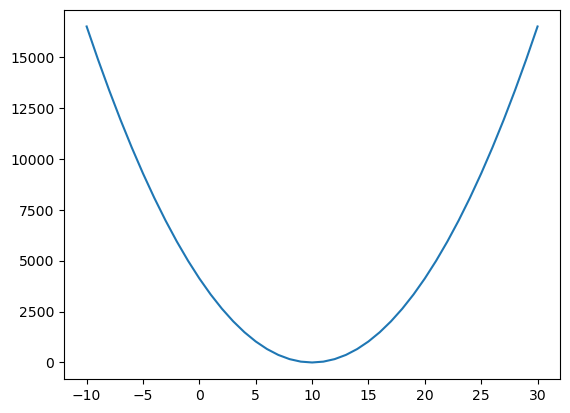

In [15]:
# 가중치(w)변화에 따른 비용하수(mse)값의 변화 그래프 그리기
plt.plot(range(-10,31),cost_list)
plt.show()

In [16]:
# 분류 모델 score - 정확도
# 회귀 모델 score - R2 score(유사도)
linear_model.score(data[['시간']],data['성적'])

1.0

### 보스턴 주택값 예측 실습

- 컬럼값들의 특징

<table border=0 align=left width=500>
  <tr><th>feature<th width=400>설명
  <tr><td>Crim<td>지역별 범죄 발생률
  <tr><td>ZN<td>25,000 평방 피트를 초과하는 거주 지역의 비율
  <tr><td>IDUS<td>비 상업 지역 넓이 비율
  <tr><td>CHAS<td>찰스강에 대한 더미 변수(강의 경계에 위치한 경우 1 아니면 0
  <tr><td>NOX<td>일산화질소 농도
  <tr><td>RM<td>거주할 수 있는 방 개수
  <tr><td>AGE<td>1940년 이전에 건축된 소유 주택의 비율
  <tr><td>DIS<td>5개 주요 고용센터까지의 가중 거리
  <tr><td>RAD<td>고속도로 접근 용이도
  <tr><td>TAX<td>10,000달러 당 재산세율
  <tr><td>PTRATIO<td>지역의 교사와 학생 수 비율
  <tr><td>B<td>지역의 흑인 거주 비율
  <tr><td>LSTAT<td>하위 계층의 비율
</table>      

In [17]:
# 데이터 가져오기
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [18]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [19]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target)
df_boston = pd.concat([X,y], axis=1)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

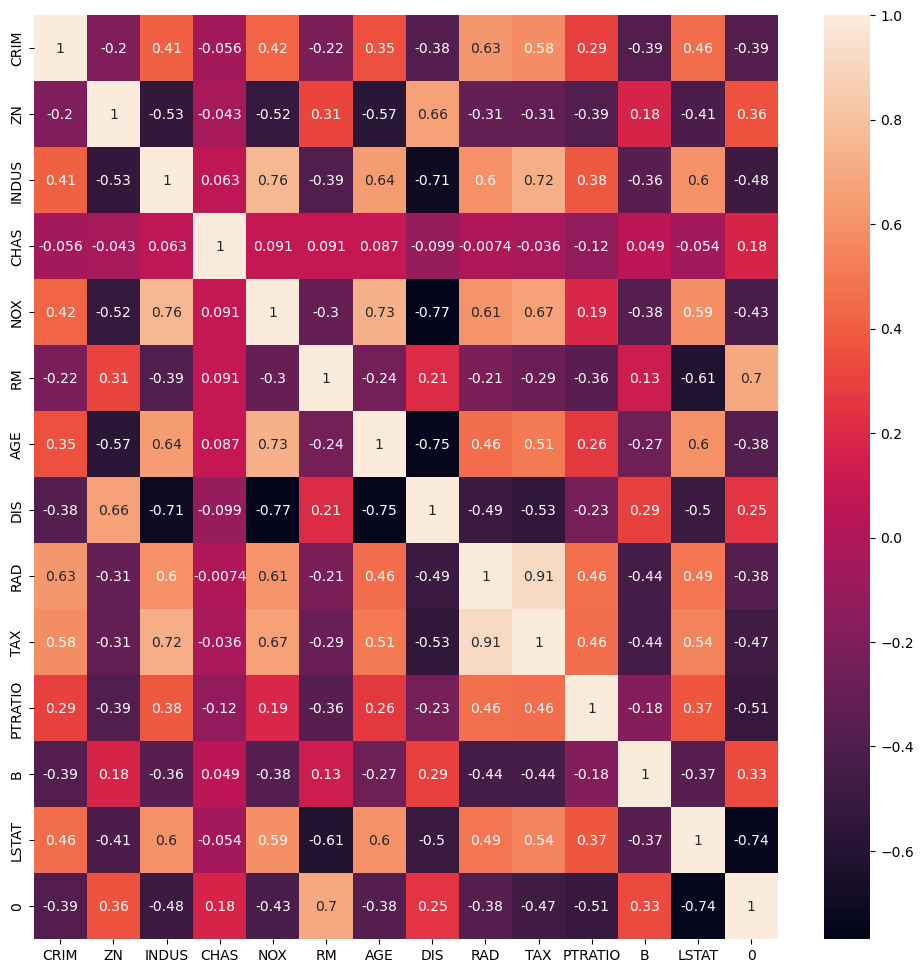

In [20]:
import seaborn as sb

plt.figure(figsize=(12,12))
sb.heatmap(df_boston.corr(), annot=True)

In [21]:
# 훈련데이터와 평가데이터로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354, 1), (152, 1))

In [22]:
# 선형 회귀를 이용해서 집값 예측
from sklearn.linear_model import LinearRegression

linear_model.fit(X_train,y_train)

LinearRegression()

In [23]:
# score() : 회귀모델에서는 R2 score를 구함 - 유사도
linear_model.score(X_train, y_train)

0.7507803185682939

In [24]:
linear_model.score(X_test, y_test)

0.700049817050999

### 모델 저장  

In [25]:
import pickle #파이썬에 사용하는 데이터타입 그대로 저장

# wb : write
with open("./model.pickle","wb") as f:
    pickle.dump(linear_model, f)

In [26]:
# 모델 불러와서 사용
with open("./model.pickle","rb") as f:
    new_model = pickle.load(f)

In [27]:
new_model.score(X_train, y_train)

0.7507803185682939

In [28]:
# 회귀모델 평가 - 오차, R2 score(유사도)
from sklearn.metrics import mean_squared_error

pre_train=new_model.predict(X_train)
pre_test=new_model.predict(X_test)

print("훈련 오차 : ",mean_squared_error(pre_train, y_train))
print("평가 오차 : ",)

훈련 오차 :  21.024239146904783
평가 오차 : 


### 경사하강법 사용

In [29]:
# SGD Regressor 사용
from sklearn.linear_model import SGDRegressor # 경사하강법이 적용된 모델

In [30]:
# 데이터 - 시간성적 데이터

# 모델 생성
# max_iter : 학습 횟수, 가중치 업데이트 반복 횟수(epochs)
# eta0 : 학습률(Learning Rate) - 변동폭
# verbose : 학습과정 표시 -> 0 : 출력하지않고 학습이 진행됨, 1 : 학습과정을 자세히 출력해 줌, 2 : 함축적인 정보만 출력해 줌
sgd_model = SGDRegressor(max_iter = 5000, eta0 = 0.001, verbose = 1)

In [31]:
# 학습
# 반복횟수가 다 차지않더라도 학습이 멈추게 됨 -> 최적의 w,b를 찾았다고 생각하기 때문에!
# Norm - 가중치, 기울기 -> w
# Bias - 절편 -> b
# loss - 비용함수(MSE)
sgd_model.fit(data[['시간']], data['성적'])

-- Epoch 1
Norm: 1.40, NNZs: 1, Bias: 0.188394, T: 4, Avg. loss: 1872.600549
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.24, NNZs: 1, Bias: 0.306665, T: 8, Avg. loss: 1422.999621
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.94, NNZs: 1, Bias: 0.402747, T: 12, Avg. loss: 1161.121261
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.51, NNZs: 1, Bias: 0.482778, T: 16, Avg. loss: 962.115137
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4.01, NNZs: 1, Bias: 0.552072, T: 20, Avg. loss: 811.247925
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.44, NNZs: 1, Bias: 0.612808, T: 24, Avg. loss: 688.877891
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.83, NNZs: 1, Bias: 0.666701, T: 28, Avg. loss: 590.599912
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.18, NNZs: 1, Bias: 0.715052, T: 32, Avg. loss: 508.545569
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.50, NNZs: 1, Bias: 0.758545, T: 36, Avg. loss: 440.731401
Total training time: 0.00 

SGDRegressor(eta0=0.001, max_iter=5000, verbose=1)

In [32]:
# y = 9.79x + 0.18
# y = 10x

# 예측
sgd_model.predict([[7]])

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([69.8830446])

In [33]:
# 가중치, 기울기, 계수 출력
print(sgd_model.coef_)
# 절편, 편향 출력
print(sgd_model.intercept_)

[9.79383312]
[1.32621275]


In [34]:
# r-squared, R2_score -> 같은 의미

# 1에 가까울수록 예측을 잘 해내고 있음을 의미
# 회귀성능평가 - score -> R2 score
sgd_model.score(data[['시간']], data['성적'])

0.9995507549747388